In [0]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [0]:
# encoding dim은 축소된 representation vector의 크기를 말합니다.
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.summary()

W0220 12:02:07.301073 140254407292800 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0220 12:02:07.312117 140254407292800 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0220 12:02:07.321599 140254407292800 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

W0220 12:03:31.558703 140254407292800 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0220 12:03:31.584562 140254407292800 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0220 12:03:31.591403 140254407292800 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [0]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

W0220 12:08:44.832320 140254407292800 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0220 12:08:44.839374 140254407292800 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W0220 12:08:44.904670 140254407292800 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0220 12:08:44.913309 140254407292800 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0220 12:08:44.914479 140254407292800 module_wrapper.py:139] From /usr/local/li

Train on 60000 samples, validate on 10000 samples
Epoch 1/50


W0220 12:08:46.458506 140254407292800 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0220 12:08:46.459908 140254407292800 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W0220 12:08:46.553234 140254407292800 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



60000/60000 [==============================] - 11s 180us/step - loss: 0.3716 - val_loss: 0.2722
Epoch 2/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.2662 - val_loss: 0.2570
Epoch 3/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2482 - val_loss: 0.2369
Epoch 4/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.2282 - val_loss: 0.2171
Epoch 5/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.2109 - val_loss: 0.2027
Epoch 6/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1993 - val_loss: 0.1934
Epoch 7/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1912 - val_loss: 0.1862
Epoch 8/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1844 - val_loss: 0.1798
Epoch 9/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.1783 - val_loss: 0.1740
Epoch 10/50
60000/60000 [==============================] - 1s 22

In [0]:
decoded_imgs = autoencoder.predict(x_test)

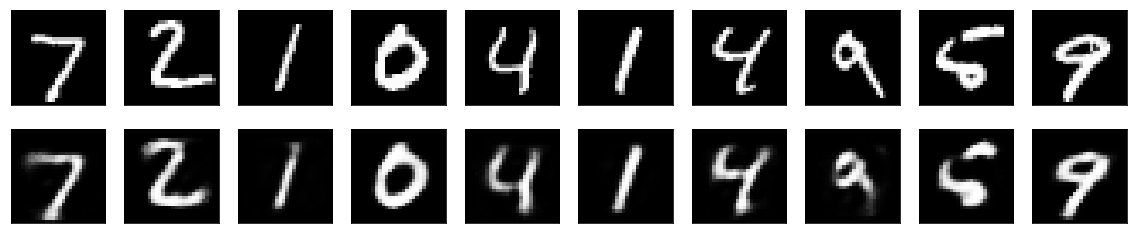

In [0]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Deep autoencoder by stack dense layers

In [0]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [0]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.3550 - val_loss: 0.2647
Epoch 2/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.2576 - val_loss: 0.2510
Epoch 3/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.2427 - val_loss: 0.2362
Epoch 4/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.2268 - val_loss: 0.2148
Epoch 5/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.2059 - val_loss: 0.1962
Epoch 6/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.1913 - val_loss: 0.1847
Epoch 7/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.1832 - val_loss: 0.1779
Epoch 8/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.1775 - val_loss: 0.1739
Epoch 9/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.1724 - val_loss: 0.1

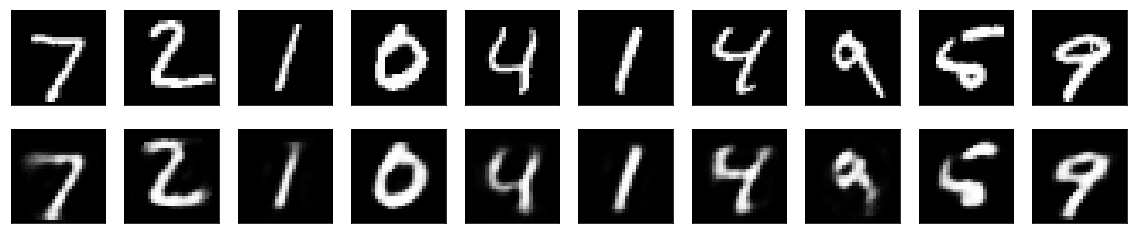

In [0]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()